In [ ]:
!pip install yfinance

In [ ]:
#BIBLIOTECAS
import yfinance as yf
import pandas as pd
import numpy as np

In [6]:
# ATIVOS DA CARTEIRA
Ativos = ['PETR4.SA', 'VALE3.SA', 'WEGE3.SA', 'RADL3.SA', 'OIBR3.SA', 'KNRI11.SA', 'SMAL11.SA', 'AAPL34.SA', 'IVVB11.SA', 'ETH-USD', 'USDBRL=X']

In [7]:
# PERÍODO DE EXTRAÇÃO DOS DADOS
start = '2016-06-01'
stop = '2023-11-30'

In [8]:
# PREÇOS DE FECHAMENTO
dataframe = pd.DataFrame()
for i in Ativos:
    dataframe[i] = yf.download(i, start = start, end = stop)['Adj Close']
dataframe['ETH-BRL'] = dataframe['ETH-USD']*dataframe['USDBRL=X']
dataframe = dataframe.drop(columns=['ETH-USD', 'USDBRL=X'])
dataframe

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL
Date,,,,,,,,,,
2016-06-01,2.793096,9.004845,5.072270,10.717938,7.686808,111.331703,44.750000,4.058858,77.769997,NaN
2016-06-02,2.840899,9.329345,5.031392,10.732273,9.477909,110.805222,45.669998,4.058858,77.809998,NaN
2016-06-03,2.926262,10.134351,5.051831,10.868466,9.627167,110.468613,46.299999,3.996715,76.379997,NaN
2016-06-06,2.888702,10.539976,5.092708,10.920436,9.701796,112.212067,46.450001,3.951834,76.019997,NaN
2016-06-07,2.943335,10.340283,5.055238,10.830834,10.373459,112.203438,46.439999,3.951834,75.150002,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-11-23,35.169998,74.379997,33.991993,28.251919,0.650000,157.655319,104.900002,46.560001,247.500000,10116.174423
2023-11-24,35.270000,73.750000,33.652672,28.222023,0.650000,159.990601,102.900002,46.400002,248.100006,10202.848486
2023-11-27,35.070000,73.309998,34.071831,28.999327,0.640000,157.526154,103.720001,46.500000,247.000000,9936.169503


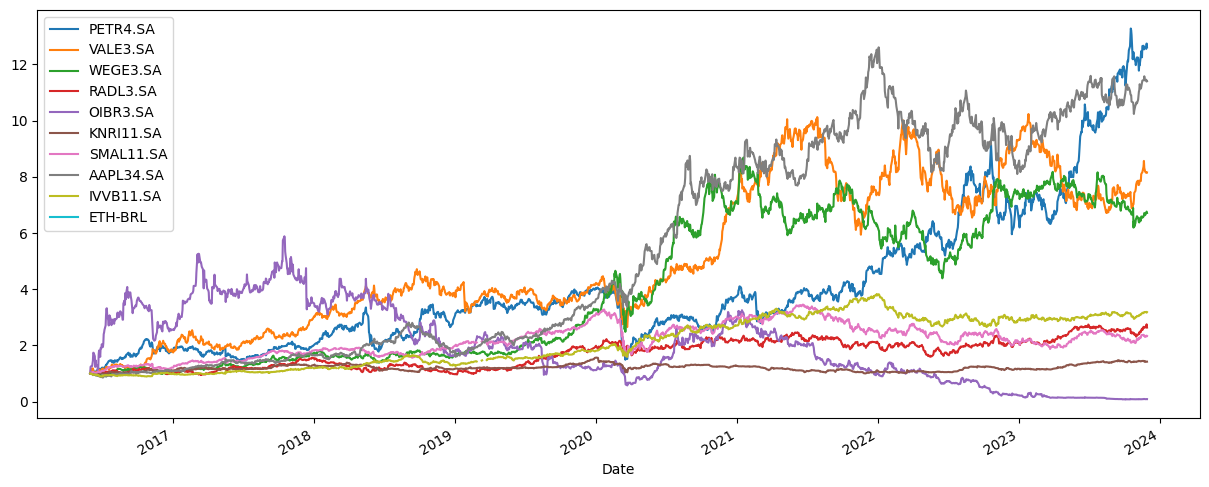

In [9]:
# Ativos normalizados

normalizado = dataframe/dataframe.iloc[0]
normalizado.plot(figsize = (15,6));

In [10]:
# Construir carteira

Buy = {'PETR4.SA': 500, 'VALE3.SA': 500, 'WEGE3.SA': 500, 'RADL3.SA': 500, 'OIBR3.SA': 200, 'KNRI11.SA': 500, 'SMAL11.SA': 500, 'AAPL34.SA': 1000, 'IVVB11.SA': 800, 'ETH-BRL': 500}
By_df = pd.Series(data=Buy, index=list(Buy.keys()))
total_compras = sum(Buy.values())
print("Total de compras:", "R$", total_compras)

Total de compras: R$ 5500


In [11]:
# Calculo de papéis de compras
first = dataframe.iloc[0]
n_ações = (By_df/first)
Pl = dataframe*n_ações
Pl['PL Total'] = Pl.iloc[:].sum(axis=1)
Pl.head().fillna(0)

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,
2016-06-01,500.000000,500.000000,500.000000,500.000000,200.000000,500.000000,500.000000,1000.000000,800.000000,0.0,5000.000000
2016-06-02,508.557380,518.018083,495.970367,500.668724,246.601943,497.635527,510.279309,1000.000000,800.411479,0.0,5078.142813
2016-06-03,523.838522,562.716579,497.985207,507.022244,250.485419,496.123788,517.318427,984.689340,785.701433,0.0,5125.880959
2016-06-06,517.114802,585.239197,502.014605,509.446662,252.427157,503.953786,518.994422,973.632006,781.998199,0.0,5144.820835
2016-06-07,526.894793,574.151125,498.321006,505.266683,269.902896,503.915033,518.882666,973.632006,773.048783,0.0,5144.014991


In [12]:
# Extraindo dados do IBOV

ibov = yf.download('^BVSP', start = start, end = stop)
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)
ibov.index = pd.to_datetime(ibov.index)
Pl.index = pd.to_datetime(Pl.index)
New_df = pd.merge(ibov, Pl, how = 'inner', on = 'Date').round(2).fillna(0)
New_df.head(-3)

[*********************100%%**********************]  1 of 1 completed


,IBOV,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,
2016-06-01,49013.0,500.00,500.00,500.00,500.00,200.00,500.00,500.00,1000.00,800.00,0.0,5000.00
2016-06-02,49887.0,508.56,518.02,495.97,500.67,246.60,497.64,510.28,1000.00,800.41,0.0,5078.14
2016-06-03,50619.0,523.84,562.72,497.99,507.02,250.49,496.12,517.32,984.69,785.70,0.0,5125.88
2016-06-06,50432.0,517.11,585.24,502.01,509.45,252.43,503.95,518.99,973.63,782.00,0.0,5144.82
2016-06-07,50488.0,526.89,574.15,498.32,505.27,269.90,503.92,518.88,973.63,773.05,0.0,5144.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-20,126095.0,6333.58,4181.77,3293.71,1329.60,17.17,722.19,1187.71,11441.64,2517.17,0.0,31024.53
2023-11-21,125607.0,6268.07,4282.93,3311.42,1313.79,18.21,722.19,1169.39,11439.18,2532.29,0.0,31057.46
2023-11-22,126035.0,6294.09,4156.10,3354.70,1320.30,17.69,710.50,1163.69,11579.61,2550.60,0.0,31147.27


<AxesSubplot:xlabel='Date'>

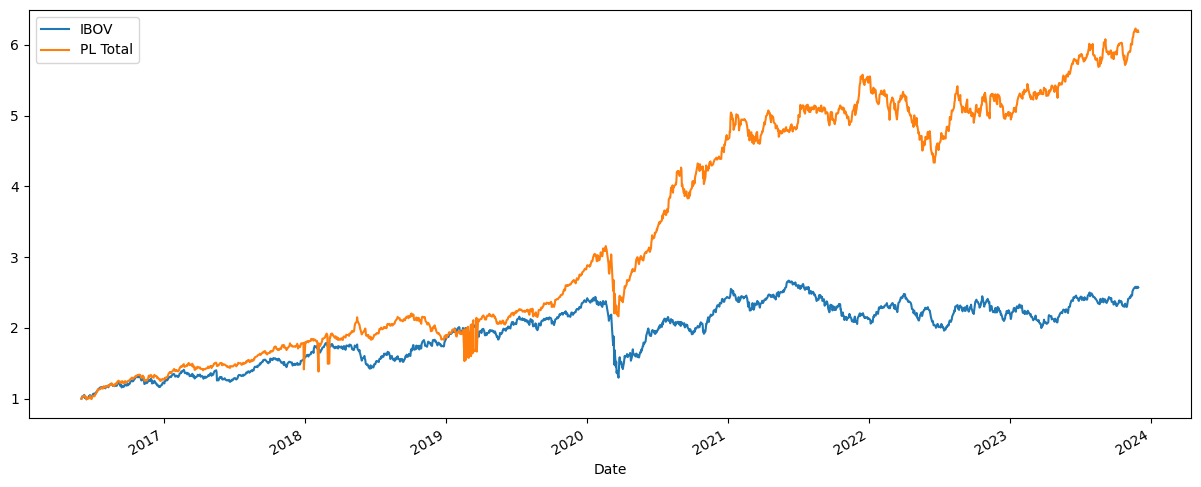

In [13]:
# Normalizando
Pl_normalizado = New_df / New_df.iloc[0]
Pl_normalizado[['IBOV', 'PL Total']].plot(figsize= (15,6))